In [19]:
# we will train models with the features selected by Boruta
# however, boruta selected both color based and shape based features
# so this time models will be trained with all the extracted features

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
with open('./pickle/lapZeroBrownSpot.pickle', 'rb') as handle:
    lapZeroBrownSpot = pickle.load(handle)
    
with open('./pickle/lapZeroHealthy.pickle', 'rb') as handle:
    lapZeroHealthy = pickle.load(handle)
    
with open('./pickle/lapZeroHispa.pickle', 'rb') as handle:
    lapZeroHispa = pickle.load(handle)
    
with open('./pickle/lapZeroLeafBlast.pickle', 'rb') as handle:
    lapZeroLeafBlast = pickle.load(handle)

with open('./pickle/lapOneBrownSpot.pickle', 'rb') as handle:
    lapOneBrownSpot = pickle.load(handle)
    
with open('./pickle/lapOneHealthy.pickle', 'rb') as handle:
    lapOneHealthy = pickle.load(handle)
    
with open('./pickle/lapOneHispa.pickle', 'rb') as handle:
    lapOneHispa = pickle.load(handle)
    
with open('./pickle/lapOneLeafBlast.pickle', 'rb') as handle:
    lapOneLeafBlast = pickle.load(handle)
    
with open('./pickle/lapTwoBrownSpot.pickle', 'rb') as handle:
    lapTwoBrownSpot = pickle.load(handle)
    
with open('./pickle/lapTwoHealthy.pickle', 'rb') as handle:
    lapTwoHealthy = pickle.load(handle)
    
with open('./pickle/lapTwoHispa.pickle', 'rb') as handle:
    lapTwoHispa = pickle.load(handle)
    
with open('./pickle/lapTwoLeafBlast.pickle', 'rb') as handle:
    lapTwoLeafBlast = pickle.load(handle)
    
with open('./pickle/areaBrownSpot.pickle', 'rb') as handle:
    areaBrownSpot = pickle.load(handle)
    
with open('./pickle/areaHealthy.pickle', 'rb') as handle:
    areaHealthy = pickle.load(handle)
    
with open('./pickle/areaHispa.pickle', 'rb') as handle:
    areaHispa = pickle.load(handle)
    
with open('./pickle/areaLeafBlast.pickle', 'rb') as handle:
    areaLeafBlast = pickle.load(handle)
    
with open('./pickle/perimeterBrownSpot.pickle', 'rb') as handle:
    perimeterBrownSpot = pickle.load(handle)
    
with open('./pickle/perimeterHealthy.pickle', 'rb') as handle:
    perimeterHealthy = pickle.load(handle)
    
with open('./pickle/perimeterHispa.pickle', 'rb') as handle:
    perimeterHispa = pickle.load(handle)
    
with open('./pickle/perimeterLeafBlast.pickle', 'rb') as handle:
    perimeterLeafBlast = pickle.load(handle)

In [23]:
featuresSelectedByBoruta = []

target = []

for i in range(523):
    featuresSelectedByBoruta.append([lapZeroBrownSpot[i], lapOneBrownSpot[i], lapTwoBrownSpot[i], areaBrownSpot[i], perimeterBrownSpot[i]])
    target.append(0) # we are representing brownspot class as '0'
    featuresSelectedByBoruta.append([lapZeroHealthy[i], lapOneHealthy[i], lapTwoHealthy[i], areaHealthy[i], perimeterHealthy[i]])
    target.append(1) # we are representing healthy class as '1'
    featuresSelectedByBoruta.append([lapZeroHispa[i], lapOneHispa[i], lapTwoHispa[i], areaHispa[i], perimeterHispa[i]])
    target.append(2) # we are representing hispa class as '2'
    featuresSelectedByBoruta.append([lapZeroLeafBlast[i], lapOneLeafBlast[i], lapTwoLeafBlast[i], areaLeafBlast[i], perimeterLeafBlast[i]])
    target.append(3) # we are representing leafblast class as '3'

In [24]:
featuresSelectedByBoruta = np.array(featuresSelectedByBoruta)
target = np.array(target)

In [25]:
columnsOfDataframe = ['laplacian zero', 'laplacian one', 'laplacian two', 'area', 'perimeter']

In [26]:
df = pd.DataFrame(data=np.c_[featuresSelectedByBoruta, target], columns=columnsOfDataframe + ['target'])

In [27]:
df.head()

,laplacian zero,laplacian one,laplacian two,area,perimeter,target
0,202035314.0,130274018.0,326438316.0,4.0,7.656854,0.0
1,57311835.0,92589406.0,417514567.0,800275.0,5897.336339,1.0
2,599509635.0,195771643.0,698701186.0,1365656.0,8494.155872,2.0
3,60663745.0,330155952.0,365917071.0,110584.0,11275.263305,3.0
4,504567341.0,303905779.0,797751776.0,192.5,62.526911,0.0


In [28]:
X = df.drop('target', axis = 1)
y = df['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# parameterGrid = { 
#     'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)], 
#     'max_features': ['sqrt', 'log2', None], 
#     'max_depth': [3, 6, 9], 
#     'max_leaf_nodes': [3, 6, 9], 
# }

In [32]:
parameterGrid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)], 
}

In [33]:
gridSearch = GridSearchCV(RandomForestClassifier(), 
                           param_grid=parameterGrid) 
gridSearch.fit(X_train, y_train) 
print(gridSearch.best_estimator_)

RandomForestClassifier(n_estimators=150)


In [34]:
model = RandomForestClassifier(n_estimators=150, random_state=42)

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [36]:
y_pred = model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)

In [38]:
print(accuracy)

0.4797136038186158


In [62]:
# now I will represent the preformance of the RF model by a confusion matrix

In [64]:
cm = confusion_matrix(y_test, y_pred)

In [65]:
cmDF = pd.DataFrame(cm,
                     index = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'], 
                     columns = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'])

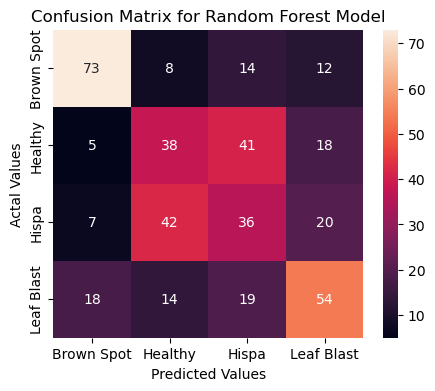

In [68]:
# plotting the confusion matrix to represent the preformance of Random Forest Model
plt.figure(figsize=(5,4))
sns.heatmap(cmDF, annot=True)
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [41]:
modelDT = DecisionTreeClassifier(random_state=42)

In [42]:
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
y_predDT = modelDT.predict(X_test)

In [44]:
accuracyDT = accuracy_score(y_test, y_predDT)

In [45]:
print(accuracyDT)

0.4343675417661098


In [69]:
# now I will represent the preformance of the DT model by a confusion matrix

In [70]:
cmDT = confusion_matrix(y_test, y_predDT)

In [71]:
cmDTDF = pd.DataFrame(cmDT,
                     index = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'], 
                     columns = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'])

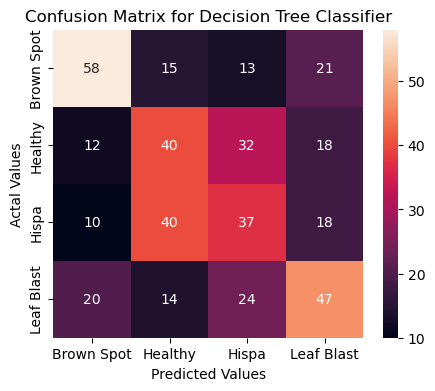

In [72]:
# plotting the confusion matrix to represent the preformance of  Decision Tree classifier
plt.figure(figsize=(5,4))
sns.heatmap(cmDTDF, annot=True)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [47]:
param_gridSVM = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
}

In [48]:
clfSVM = SVC(random_state=42)

In [49]:
gridSearchSVM = GridSearchCV(clfSVM, param_gridSVM, cv=5, scoring='accuracy', n_jobs=-1)

In [50]:
gridSearchSVM.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [51]:
bestClfSVM = gridSearchSVM.best_estimator_

In [52]:
y_predSVM = bestClfSVM.predict(X_test)

In [53]:
accuracySVM = accuracy_score(y_test, y_predSVM)

In [54]:
print(accuracySVM)

0.4486873508353222


In [73]:
# now I will represent the preformance of the SVM classifier model by a confusion matrix

In [74]:
cmSVM = confusion_matrix(y_test, y_predSVM)

In [75]:
cmSVMDF = pd.DataFrame(cmSVM,
                     index = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'], 
                     columns = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'])

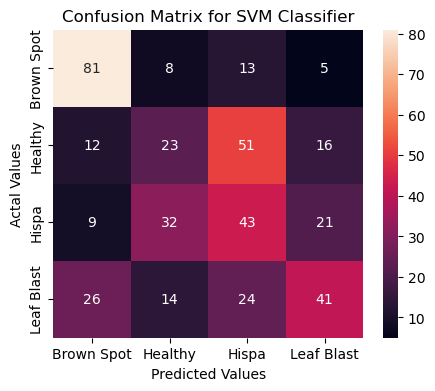

In [76]:
# plotting the confusion matrix to represent the preformance of SVM Model
plt.figure(figsize=(5,4))
sns.heatmap(cmSVMDF, annot=True)
plt.title('Confusion Matrix for SVM Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [55]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

         0.0       0.63      0.76      0.69       107
         1.0       0.30      0.23      0.26       102
         2.0       0.33      0.41      0.36       105
         3.0       0.49      0.39      0.44       105

    accuracy                           0.45       419
   macro avg       0.44      0.45      0.44       419
weighted avg       0.44      0.45      0.44       419



In [57]:
clfLR = LogisticRegression(random_state=42)

In [58]:
clfLR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [59]:
y_predLR = clfLR.predict(X_test)

In [60]:
accuracyLR = accuracy_score(y_test, y_predLR)

In [61]:
print(accuracyLR)

0.4152744630071599


In [77]:
# now I will represent the preformance of the Logistic Regression classifier model by a confusion matrix

In [78]:
cmLR = confusion_matrix(y_test, y_predLR)

In [79]:
cmLRDF = pd.DataFrame(cmLR,
                     index = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'], 
                     columns = ['Brown Spot','Healthy','Hispa', 'Leaf Blast'])

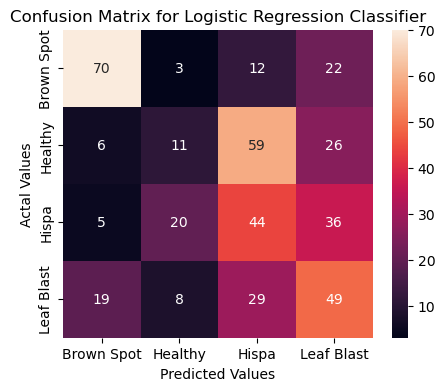

In [80]:
# plotting the confusion matrix to represent the preformance of Logistic Regression Model
plt.figure(figsize=(5,4))
sns.heatmap(cmLRDF, annot=True)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()